In [1]:
cd "C:/Users/aloe8475/Dropbox (Sydney Uni)/Data/ASN_simulation/Python/ASN"

C:\Users\aloe8475\Dropbox (Sydney Uni)\Data\ASN_simulation\Python\ASN


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import networkx as nx
from scipy.io import loadmat, savemat
from draw.draw_graph import draw_graph

In [3]:
plt.style.use('classic')

In [4]:
adj = loadmat('connectivity_data/AdjMat100nw.mat')['adjmat'].todense()
theAlon = nx.from_numpy_array(adj)

In [131]:
Connectivity = connectivity__(graph = theAlon)

signal = np.ones(4000)*0.005
signal[200:400] = 1
signal[1500:1700] = 1
sim = defaultSimulation(Connectivity, T = 20, dt = 0.01, collapse = True, biasType = 'Custom', contactMode = 'preSet', electrodes = [7,81],offTime = 20, cutsomSignal = signal)

Running Simulation : 100%|███████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 4763.45it/s]


First current path [7, 9, 11, 20, 17, 33, 43, 58, 69, 65, 81] formed at time = 3.8 s.


In [132]:
## SAVE NEW PAIRING LIST WITH SAME PATH LENGTH

adjMat=Connectivity.adj_matrix
pathLength=4;

# Which pairings have the same length? & Different COMM values
distMat = np.zeros(adjMat.shape)
G = nx.from_numpy_array(adjMat)
for i in range(adjMat[:,0].size):
    for j in range(i+1, adjMat[:,0].size):
         distMat[i,j] = nx.shortest_path_length(G, i, j)
# distMat = distMat + distMat.T
pairingList=np.where(distMat==pathLength)
pairingList=np.array(pairingList).T
pairingList

array([[ 0,  7],
       [ 0, 23],
       [ 0, 29],
       ...,
       [92, 94],
       [94, 96],
       [97, 98]], dtype=int64)

In [133]:
#List of pairs with Path Length of X 
pairingList=pairingList[np.random.choice(len(pairingList),100,replace=False)]
savemat("C:/Users/aloe8475/Dropbox (Sydney Uni)/Data/ASN_simulation/Python/ASN/connectivity_data/ElecPosPathLength.mat",dict(ElecPos=pairingList))

Max Current is 1.3098288215257052e-05A
Threshold would be 4.149377593360996e-05


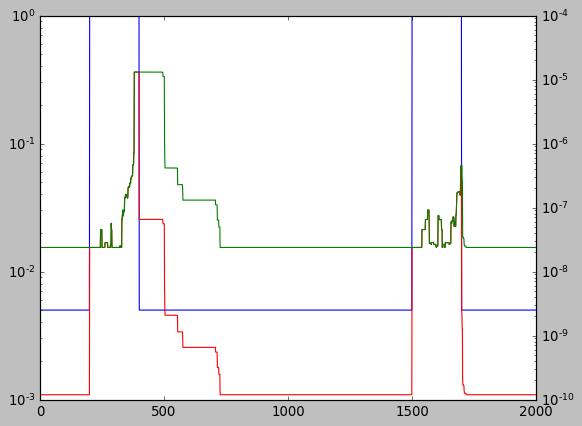

In [134]:
plt.semilogy(sim.stimulus[0].signal) #voltage
plt.twinx()
plt.semilogy(sim.electrodeCurrent[:,1], color = 'r') #current
plt.semilogy(sim.electrodeCurrent[:,1]/sim.stimulus[0].signal, color = 'g') #conductance
# plt.semilogy(np.median(abs(sim.filamentState), axis = 1), color = 'm')
# plt.axvline(372,color='k')

maxI=max(sim.electrodeCurrent[:,1])


print("Max Current is " + str(maxI) + "A")
print("Threshold would be " +str(max(sim.stimulus[0].signal)/(100*241)))

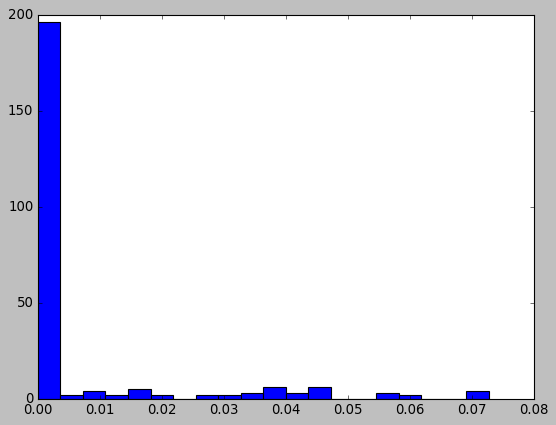

207

In [135]:
#Histograms of filament states:
plt.hist(abs(sim.filamentState[1999]),bins=20)
plt.show()
sum(abs(sim.filamentState[1999])>0)
# sum(abs(sim.filamentState[2000])==0)


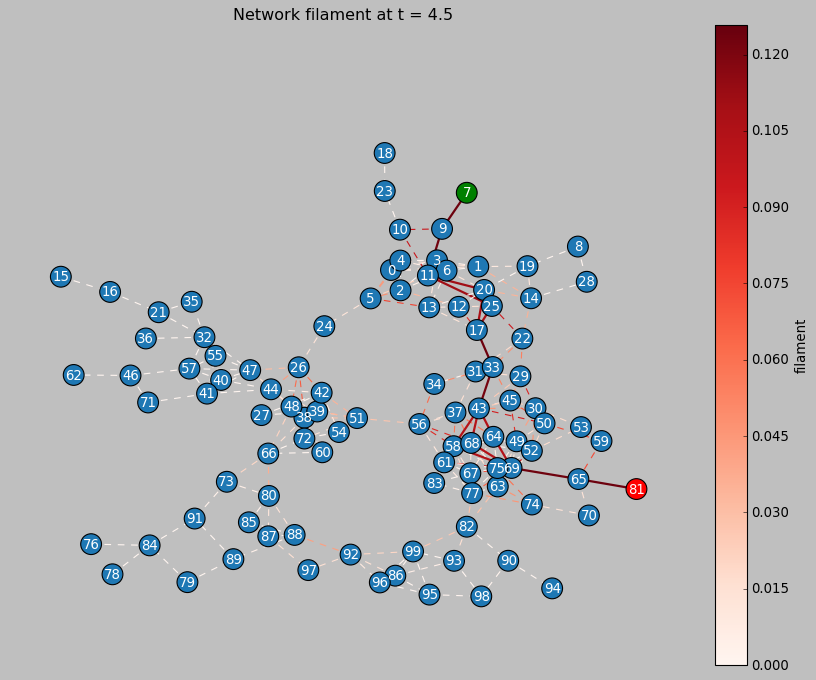

In [139]:
draw_graph(sim, time = 4.5, edge_mode= 'filament', colorbar=True)